In [1]:
import cv2
import numpy as np
# import matplotlib.pyplot as plt
import easyocr
import imutils

ImportError: cannot import name 'PILLOW_VERSION' from 'PIL' (/Users/szokirov/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/PIL/__init__.py)

In [2]:
img = cv2.imread('/Users/szokirov/Downloads/1651398730_LANDSCAPE_1280-1068x600.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [3]:
img.shape

(600, 1068, 3)

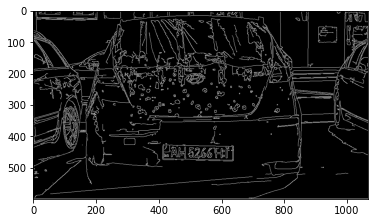

In [206]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 90)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [207]:
key_contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(key_contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [208]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10, True)
    if len(approx) == 4:
        location = approx
        break

In [209]:
approx
len(approx)

4

In [210]:
location

array([[[416, 431]],

       [[418, 472]],

       [[636, 475]],

       [[635, 433]]], dtype=int32)

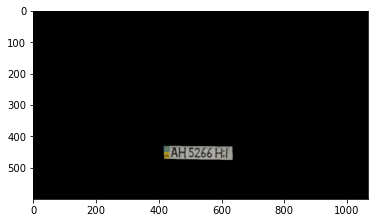

In [211]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [212]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

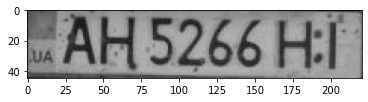

In [213]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [214]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result
result[0][-2]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


'AH5266 HI'

In [215]:
img1 = img.copy()

True

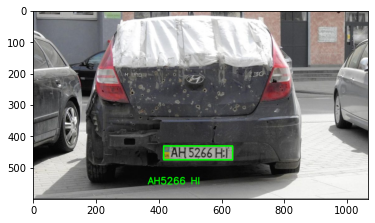

In [216]:
# results = []
# for i in range(0,2):
#     text = result[i][-2]
#     results.append(text)
# reader = easyocr.Reader(['en'])
# result = reader.readtext(cropped_image)
# result
# result[0][-2]

font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img1, text=result[0][-2], org=(approx[0][0][0]-50, approx[1][0][1]+80), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img1, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
cv2.imwrite('tested.jpg', img1)


In [217]:
import torch
import math
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

AttributeError: module 'torch.backends' has no attribute 'mps'